# Практика 3
Выполнена студентом группы ИКБО-27-22 Соловьевом И.Е.

# Импорты

In [3]:
import pandas as pd
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as sts
from scipy.stats import normaltest

from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from numpy.random import seed

## Задание 1
Загрузить данные из файла “insurance.csv”.

In [4]:
data = pd.read_csv("insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Задание 2
С помощью метода describe() посмотреть статистику по данным. Сделать выводы

In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Вывод
- Средний возраст клиентов — около 39 лет, диапазон от 18 до 64.
- Средний BMI ~30.6, что соответствует избыточному весу.
- В среднем у клиентов около 1 ребёнка, максимум — 5.
- Распределение расходов (charges) сильно варьируется: медиана ~9382, но максимум превышает 63 тыс., что говорит о наличии выбросов и высокой дисперсии.

## Задание 3
Построить гистограммы для числовых показателей. Сделать выводы.

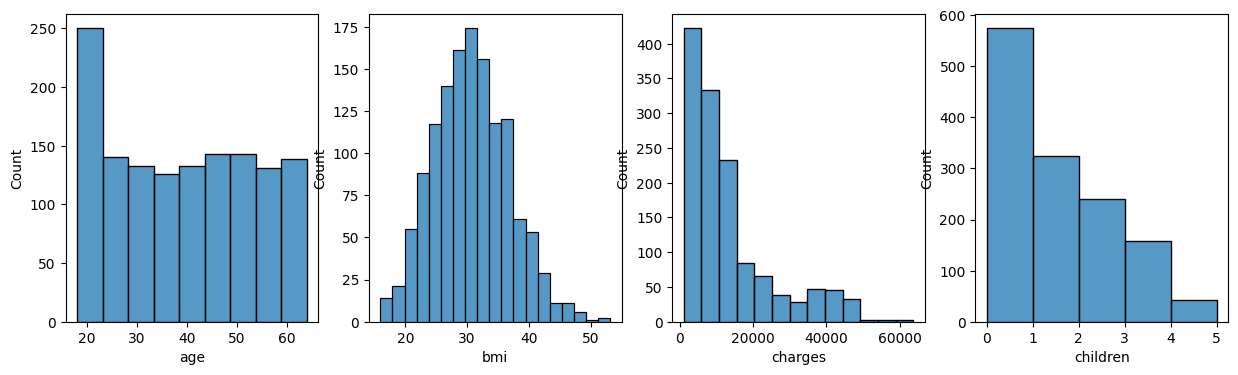

In [7]:
names = data.select_dtypes(exclude='object').columns.to_list()
unique_counts = pd.DataFrame.from_records([(col, data[col].nunique()) for col in names],
                                          columns=['Наименование признака', 'Кол-во уникальных значений']).sort_values(by=['Кол-во уникальных значений'])
plt.subplots(1, 4, figsize=(15, 4))
sns.histplot(data=data, x="children", binwidth=1)
plt.subplot(1, 4, 1)
sns.histplot(data=data, x="age", binwidth=5)
plt.subplot(1, 4, 2)
sns.histplot(data=data, x="bmi", binwidth=2)
plt.subplot(1, 4, 3)
sns.histplot(data=data, x="charges", binwidth=5000)
plt.subplot(1, 4, 4)
plt.show()

## Вывод
Признак 'children' ( кол-во детей) - преобладают семьи без детей ( почти половина). Многодетных семей ( 4 и более ребенка) очень мало, менее процента.

Признак 'age' ( возраст) - люди до 20 лет ( молодежь)- почти 20%. Остальные возрастные группы  содержат примерно равное количество.

Признак 'bmi' - Распределение признака bmi близко к нормальному, у остальных признаков - нет.Более трети имеют невысокие доходы - до 10 тыс. незначительное число ( менее процента)  имеют высокие доходы.

Более интересен анализ данных в разрезе нескольких признаков.

Можно посмотреть, например,


*   индекс массы тела в зависимости от пола
*   индекс массы тела по возрастным группам
*   расходы в зависимости от пола
*   расходы по возрастным группам

## Задание 4
Найти меры центральной тенденции и меры разброса для индекса массы тела (bmi) и расходов (charges). Отобразить результаты в виде текста и на гистограммах (3 вертикальные линии). Добавить легенду на графики. Сделать выводы.


In [13]:
def get_stat(names):
  """
  Функция для расчета и печати основных статистик.
  на входе - список названий столбцов
  на выходе- к-во признаков серии за вычетом NAN и 10 основных статистик -
  max, min, range, mean, mode, std, var, Q1, Q3, iqr
  """
  for name in names:
    count_ = data[name].count()
    max_ = data[name].max()
    min_ = data[name].min()
    range_ = round(data[name].max() - data[name].min(),1)
    mean_ = data[name].mean()
    mediana_ = data[name].quantile(0.50)
    mode_ = data[name].mode()[0]
    std_ = data[name].std()
    var_ = data[name].var()
    Q1 = data[name].quantile(0.25)
    Q3 = data[name].quantile(0.75)
    iqr = Q3-Q1
    print(f'{name}:')
    print(f'count = {count_},\n'
    f'max = {max_},\n'
    f'min = {min_},\n'
    f'range = {range_},\n'
    f'mean = {mean_},\n'
    f'mediana = {mediana_},\n'
    f'mode = {mode_},\n'
    f'std = {std_},\n'
    f'var = {var_},\n'
    f'Q1 = {Q1},\n'
    f'Q3 = {Q3},\n'
    f'IQR = {iqr}\n')
    
# Основные статистики для bmi
get_stat(names[1:2])

# основные статистики для charges
get_stat(names[3:])

bmi:
count = 1338,
max = 53.13,
min = 15.96,
range = 37.2,
mean = 30.66339686098655,
mediana = 30.4,
mode = 32.3,
std = 6.098186911679014,
var = 37.18788360977323,
Q1 = 26.29625,
Q3 = 34.69375,
IQR = 8.3975

charges:
count = 1338,
max = 63770.42801,
min = 1121.8739,
range = 62648.6,
mean = 13270.422265141257,
mediana = 9382.033,
mode = 1639.5631,
std = 12110.011236694001,
var = 146652372.15285498,
Q1 = 4740.28715,
Q3 = 16639.912515,
IQR = 11899.625365



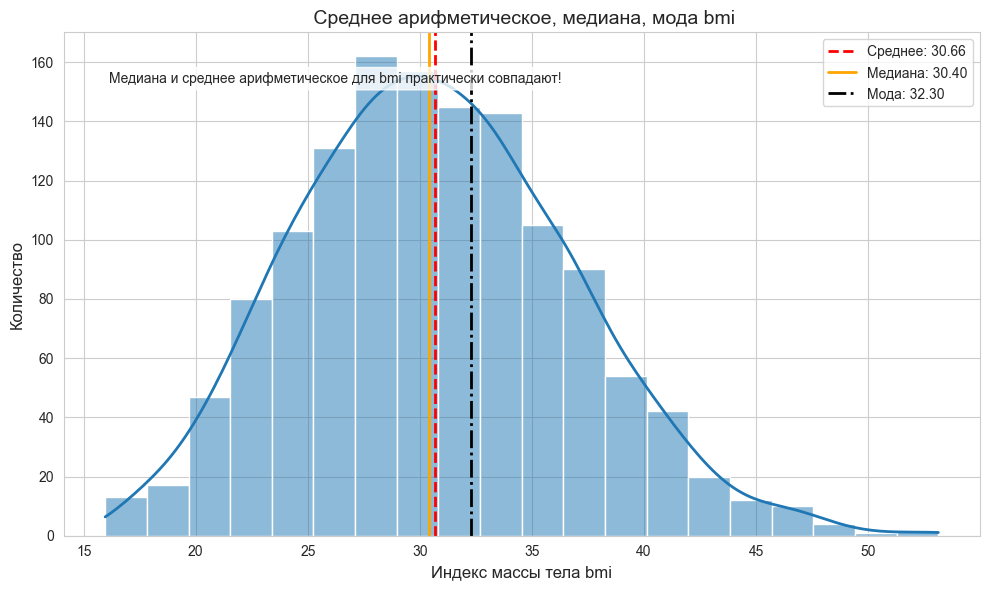

In [ ]:
def draw_hist(x, title, x_name, xlbl, xtext):
    """
    Функция для построения гистограммы с использованием seaborn
    и нанесения медианы, моды и среднего арифметического признака
    x: series данные для визуализации
    x_name: char имя признака
    xlbl:char подпись для оси х
    xtext:char вывод
    """
    plt.figure(figsize=(10, 6))
    sns.set_style("whitegrid")
    ax = sns.histplot(
    x,
    bins=20,
    kde=True,
    line_kws={'linewidth': 2}
    )
    plt.axvline(np.mean(x), color='red',
            linestyle='--', linewidth=2,
            label=f'Среднее: {np.mean(x):.2f}')
    plt.axvline(np.median(x), color='orange',
            linestyle='-', linewidth=2,
            label=f'Медиана: {np.median(x):.2f}')
    plt.axvline(x.mode()[0], color='black',
            linestyle='-.', linewidth=2,
            label=f'Мода: {x.mode()[0]:.2f}')
    plt.title(f" {title} {x_name}",
    fontsize=14)
    plt.xlabel(f"{xlbl} {x_name}", fontsize=12)
    plt.ylabel("Количество", fontsize=12)
    plt.legend()
    ax.text(0.05, 0.9, f"{xtext}",
    transform=ax.transAxes, fontsize=10,
    bbox=dict(facecolor='white', alpha=0.8, boxstyle='round'))
    plt.tight_layout()
    plt.show()

draw_hist(data['bmi'], 'Среднее арифметическое, медиана, мода', 'bmi', 'Индекс массы тела', "Медиана и среднее арифметическое для bmi практически совпадают!")

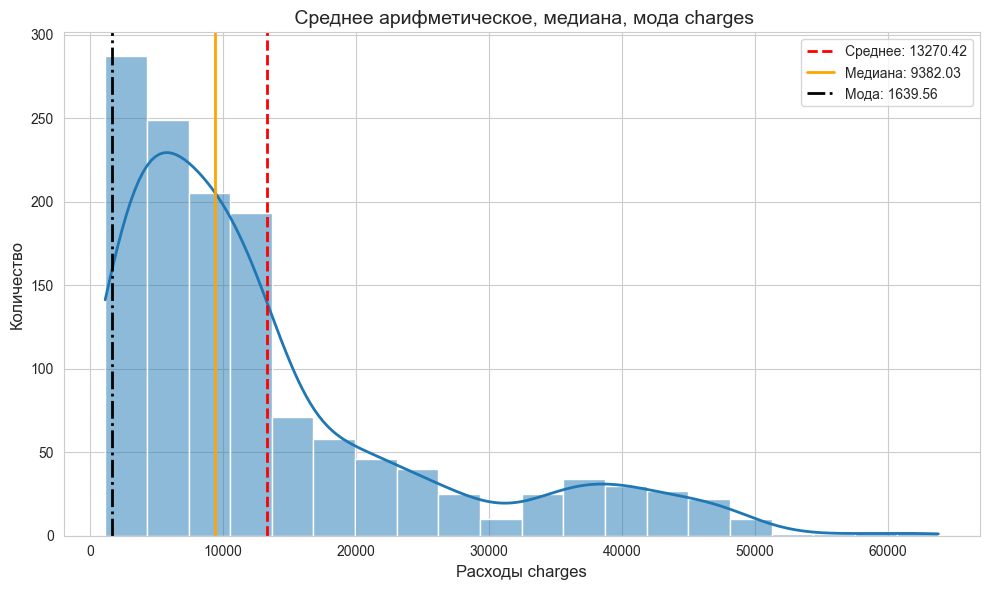

In [15]:
draw_hist(data['charges'],'Среднее арифметическое, медиана, мода', 'charges', 'Расходы', "")

## Вывод

для bmi гистограмма  визуально имеет нормальное рапределение (гипотеза требует проверки с помощью ститистических тестов!), значения среднего арифметического и медианы практически совпадают, значение моды отличается. Все три линии находятся близко к центру гистограммы.

Для charges гистограмма смещена влево. Соответсвенно, все три линии -медиана, среднее, мода не совпадают и также смещены в начало гистограммы. Вих
зуально риаспределение не является нормальным

## Задание 5
Построить box-plot для числовых показателей. Названия графиков должны соответствовать названиям признаков. Сделать выводы.

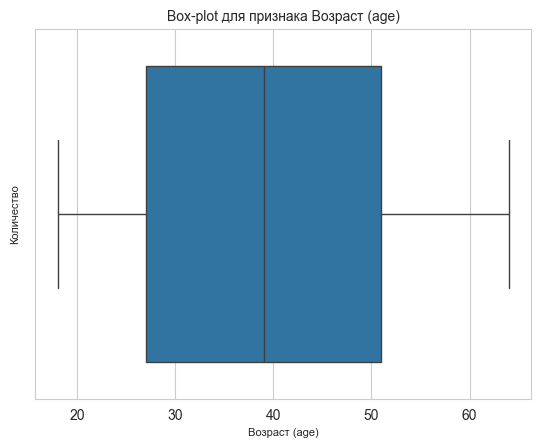

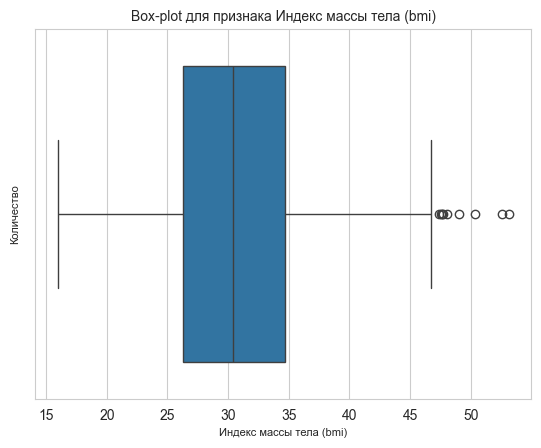

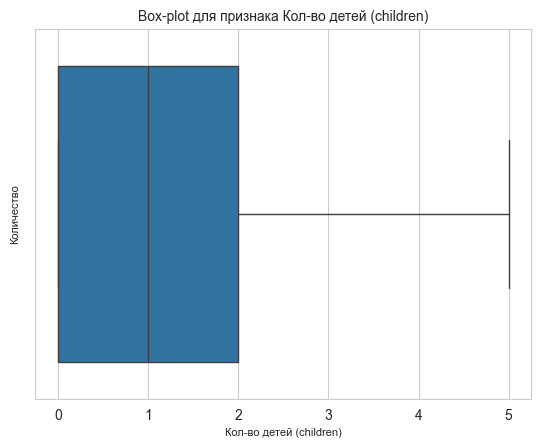

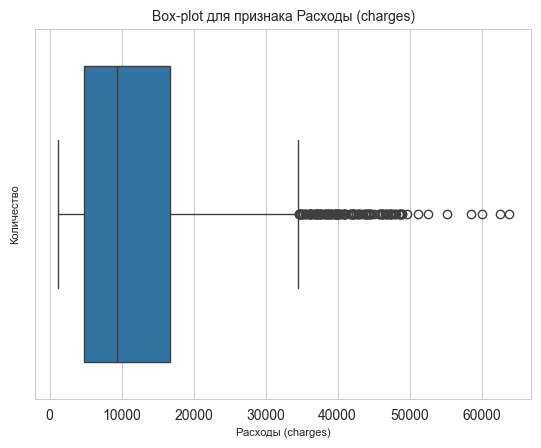

In [16]:
def get_boxplot(X, xlbl=[],  columns=[]):
    """ Функция для визуализации признаков в виде box-plot
    X: DataFrame - датафрейм признаков
    xlbl:list - список подписей для оси х
    columns: list -список имен признаков"""

    for i in range(len(columns)):
        sns.boxplot(x=X[columns[i]])
        plt.title(f"Box-plot для признака {xlbl[i]} ({columns[i]})",
        fontsize=10)
        plt.xlabel(f"{xlbl[i]} ({columns[i]})", fontsize=8)
        plt.ylabel("Количество", fontsize=8)
        plt.show()

xlbl=['Возраст', 'Индекс массы тела', 'Кол-во детей', 'Расходы'] # список подписей оси х
get_boxplot(data, xlbl, columns=names)

## Вывод

отсутствуют выбросы у признаков age и children. Значительное количество у charges и bmi

## Задание 6
Используя признак charges или imb, проверить, выполняется ли центральная предельная теорема. Использовать различные длины выборок n. Количество выборок = 300. Вывести результат в виде гистограмм. Найти стандартное отклонение и среднее для полученных распределений. Сделать выводы.

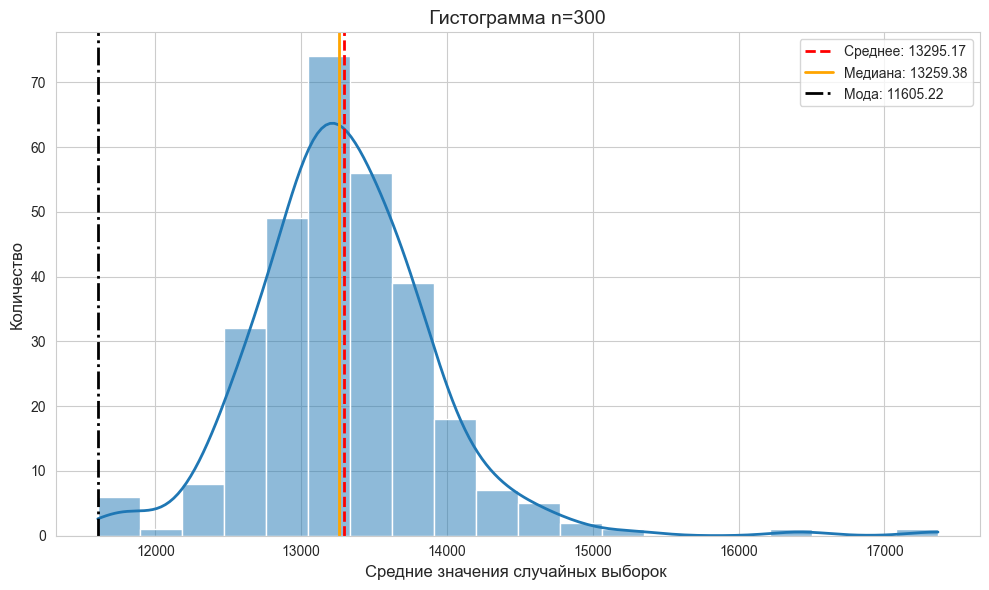

In [26]:
sample_size_min = 50
num_samples = 300
feature = data['charges']
feature_mean = np.mean(feature)
sample_sizes = np.random.randint(sample_size_min, len(feature), num_samples) # генерация размеров случайной выборки
sample_means = pd.Series([np.mean(np.random.choice(feature, sample_size)) for sample_size in sample_sizes])

draw_hist(sample_means, f'Гистограмма n={num_samples}', '','Средние значения случайных выборок',   '')

In [31]:
def get_stats(names,datas):
    """
    Функция для расчета и печати основных статистик.
    на входе - списки названий выборок и выборок
    на выходе- размер,среднее значение, дисперсия каждой из выборок, а также
    предположение о равенстве дисперсий
    """
    count_, mean_, var_, std_ =[],[],[], []
    for data in datas:
        count_.append(len(data))
        mean_.append(np.mean(data))
        var_ .append(np.var(data))
        std_.append(np.std(data))
        print(f'{names[datas.index(data)]}:')
        print(f'count = {count_[datas.index(data)]}, mean = {mean_[datas.index(data)]},  var = {var_[datas.index(data)]}, std = {std_[datas.index(data)]}')
        return count_,mean_,var_, std_

count_,mean_, var_, std_ = get_stats(['charges'], [data['charges']])
count_,mean_, var_, std_ = get_stats(['sample_means_charges'], [sample_means])

charges:
count = 1338, mean = 13270.422265141257,  var = 146542766.49354792, std = 12105.484975561612
sample_means_charges:
count = 300, mean = 13295.17402360435,  var = 398605.106744948, std = 631.3518090137605


## Вывод

В нормальном распределении меры центральной тенденции практически сопадают. Однако нормальность требует дополнительных проверок.

Судя по графику, это не нормальное распределение

Находим среднее, стандапртное отклонение, дисперсию для исходной совокупности и выборочных средних

Полученные значения среднего близки по абсолютному значению для обеих выборок, а стандартные отклоненния и дисперсии в абсолютном выражении различны.


## Задание 7
Построить 95% и 99% доверительный интервал для среднего значения расходов и среднего значения индекса массы тела.

In [32]:
feature_names = ['charges', 'bmi']
alfas =[0.95, 0.99] # доверительные интервалы
locs = [np.mean(data['charges']), np.mean(data['bmi'])] # средние значения признаков
sigmas = [np.std(data['charges']), np.std(data['bmi'])] # стандартные отклоненитя признаков
ci_lowers, ci_uppers, Ls = [], [], []
for i in range(0,2):
  ci_lower, ci_upper = sts.norm.interval(confidence=alfas[i], loc=locs[i], scale=sigmas[i])
  ci_lowers.append(ci_lower)
  ci_uppers.append(ci_upper)
  print(f'Мы уверены на {alfas[i]*100}%, что истинное среднее значение генеральной совокупности {feature_names[i]} находится в диапазоне между {ci_lowers[i]:5.3f} и {ci_uppers[i]:5.3f}')
  L = (ci_upper - ci_lower)
  Ls.append(L)
  print('Длина доверительного интервала L = ', L)

Мы уверены на 95.0%, что истинное среднее значение генеральной совокупности charges находится в диапазоне между -10455.892 и 36996.737
Длина доверительного интервала L =  47452.629134983
Мы уверены на 99.0%, что истинное среднее значение генеральной совокупности bmi находится в диапазоне между 14.961 и 46.365
Длина доверительного интервала L =  31.404035069867415


## Задание 8
Проверить распределения следующих признаков на нормальность: индекс массы тела, расходы. Сформулировать нулевую и альтернативную гипотезы. Для каждого признака использовать KS-тест и q-q plot. Сделать выводы на основе полученных p-значений.

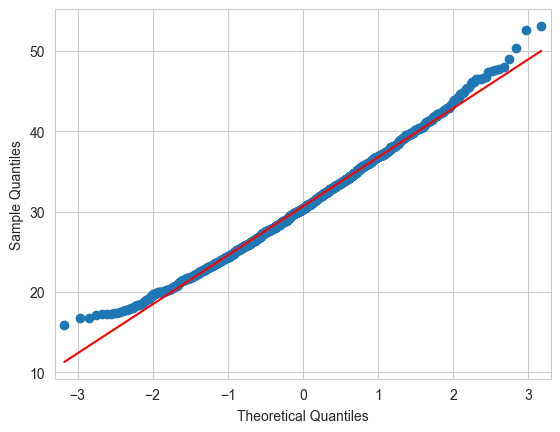

In [33]:
qqplot(data['bmi'], line='s')
plt.show()

Если удалить выбросы, то вполне вероятно, что распределение будет нормальным - большая часть точек уже ложится на прямую

Проверка нормальности распределения выборочных средних с помощью теста Колмогорова-Смирнова

In [35]:
def KS_test (names, datas):
  """
  Служебная функция для вывода информации o нормальности распределений
  по тесту Колмогорова-Смирнова c уровнем значимости 0.05.
  на входе - список выборок
  """
  seed(1)
  for data in datas:
      test_sk =  sts.kstest(data, 'norm')
      stat,p = float(test_sk.statistic), float(test_sk.pvalue)
      print(names[datas.index(data)])
      print('Statistics=%.3f, p=%.3f' % (stat, p))
      alpha = 0.05
      if p > alpha:
          print('Предположительно нормальное распределение (Недостаточно данных, чтобы отвергнуть H0)')
      else:
          print('Отвергаем H0 о нормальности распределения')
      print()

KS_test(['bmi'],[data['bmi']])

# проверка нормальности распределения charges с помощью normaltest (критерия Д’Агостино) из библиотеки scipy.stats
stat, p_value = normaltest(data['bmi'])
print('Статистика теста на нормальность: {:.3f}, p-значение: {:.3f}'.format(stat, p_value))

if p_value > 0.05:
    print('Распределение признака нормально (не отвергаем H0)')
else:
    print('Распределение признака не нормально (отвергаем H0)')

bmi
Statistics=1.000, p=0.000
Отвергаем H0 о нормальности распределения

Статистика теста на нормальность: 17.581, p-значение: 0.000
Распределение признака не нормально (отвергаем H0)


## Вывод

H0 (гипотеза отсутствия различий между распределением признака и нормальным распределением: выборка признака имеет нормальное распределение с некоторыми неизвестными параметрами.  Имеющиеся различия не являются статистически достоверными и носят случайный характер)

H1 (гипотеза о значимости различий):разность между генеральными средними сравниваемых групп не равна нулю, и исследуемые выборки не принадлежат одной генеральной совокупности, а различия между выборочными показателями носят систематический, а не случайный характер

Построение графиков qq-plot и выполнение статистических тестов ( Колмогорова-СЧмирнова и д'Агостино) позволило отвергнуть нулевую гипотезу как в отношении bmi, так и для charges

## Задание 9
Загрузить данные из файла “ECDCCases.csv”.

In [46]:
df = pd.read_csv("ECDCCases.csv")
df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
4,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
...,...,...,...,...,...,...,...,...,...,...,...,...
61899,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61900,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61901,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61902,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


## Задание 10
Проверить в данных наличие пропущенных значений. Вывести количество пропущенных значений в процентах. Удалить два признака, в которых больше всех пропущенных значений. Для оставшихся признаков обработать пропуски: для категориального признака использовать заполнение значением по умолчанию (например, «other»), для числового признака использовать заполнение медианным значением. Показать, что пропусков больше в данных нет.

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61904 entries, 0 to 61903
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   dateRep                                                     61904 non-null  object 
 1   day                                                         61904 non-null  int64  
 2   month                                                       61904 non-null  int64  
 3   year                                                        61904 non-null  int64  
 4   cases                                                       61904 non-null  int64  
 5   deaths                                                      61904 non-null  int64  
 6   countriesAndTerritories                                     61904 non-null  object 
 7   geoId                                                       61629 non-null  object 
 

In [48]:
# Вывести количество пропущенных значений в процентах.
display(pd.DataFrame(df.isna().mean() * 100).round(2))

,0
dateRep,0.00
day,0.00
month,0.00
year,0.00
cases,0.00
deaths,0.00
countriesAndTerritories,0.00
geoId,0.44
countryterritoryCode,0.20
popData2019,0.20


In [49]:
# Удалить два признака, в которых больше всех пропущенных значений
# Больше всего пропусков в 'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000' и в 'geoId'
df = df.drop(['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000' , 'geoId'], axis=1)
df.head()
# обработать пропуски: для категориального признака countryterritoryCode использовать заполнение значением по умолчанию (например, «other»)
df['countryterritoryCode'].fillna('other')
df['popData2019'].fillna(df['popData2019'].median())

0        38041757.0
1        38041757.0
2        38041757.0
3        38041757.0
4        38041757.0
            ...    
61899    14645473.0
61900    14645473.0
61901    14645473.0
61902    14645473.0
61903    14645473.0
Name: popData2019, Length: 61904, dtype: float64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61904 entries, 0 to 61903
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   dateRep                  61904 non-null  object 
 1   day                      61904 non-null  int64  
 2   month                    61904 non-null  int64  
 3   year                     61904 non-null  int64  
 4   cases                    61904 non-null  int64  
 5   deaths                   61904 non-null  int64  
 6   countriesAndTerritories  61904 non-null  object 
 7   countryterritoryCode     61781 non-null  object 
 8   popData2019              61781 non-null  float64
 9   continentExp             61904 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 4.7+ MB


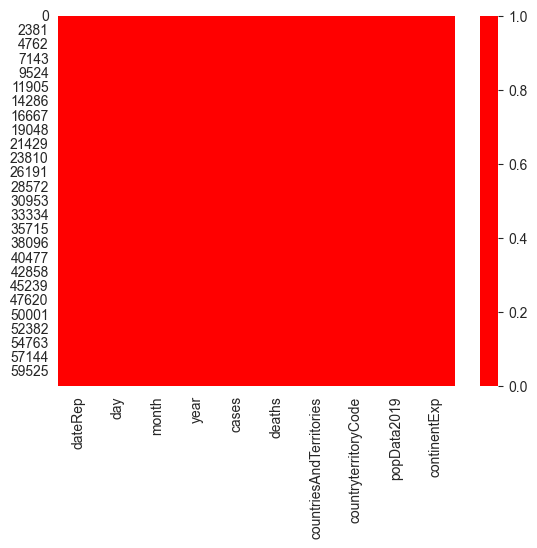

In [52]:
#Показать, что пропусков больше в данных нет.
colors=['red', 'red']
sns.heatmap(df.isna(), cmap=sns.color_palette(colors))
plt.show()

## Задание 11
Посмотреть статистику по данным, используя describe(). Сделать выводы о том, какие признаки содержат выбросы. Посмотреть, для каких стран количество смертей в день превысило 3000 и сколько таких дней было.

In [53]:
# Посмотреть статистику по данным, используя describe()
df.describe()

,day,month,year,cases,deaths,popData2019
count,61904.000000,61904.000000,61904.000000,61904.000000,61904.000000,6.178100e+04
mean,15.629232,7.067104,2019.998918,1155.079026,26.053987,4.098628e+07
std,8.841624,2.954816,0.032881,6779.010824,131.222948,1.531246e+08
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.293120e+06
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.169456e+06
75%,23.000000,10.000000,2020.000000,273.000000,4.000000,2.851583e+07
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1.433784e+09


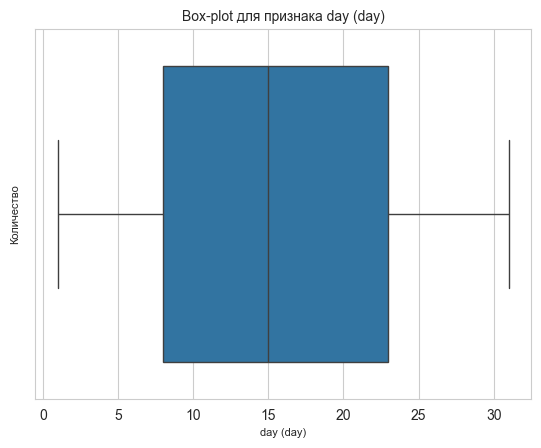

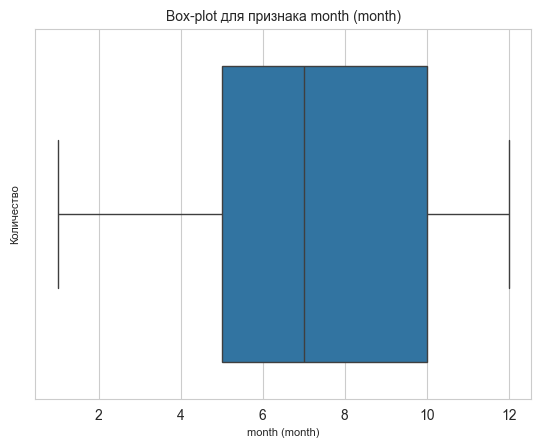

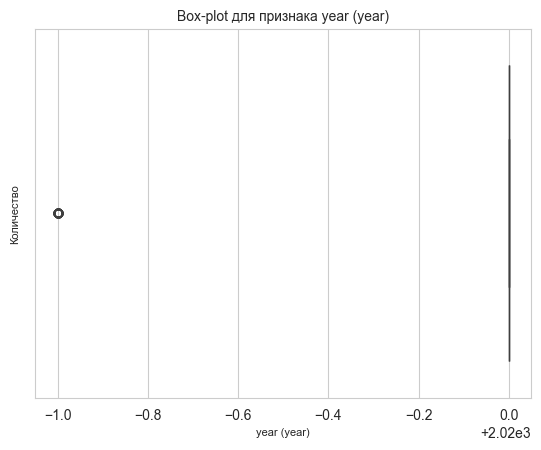

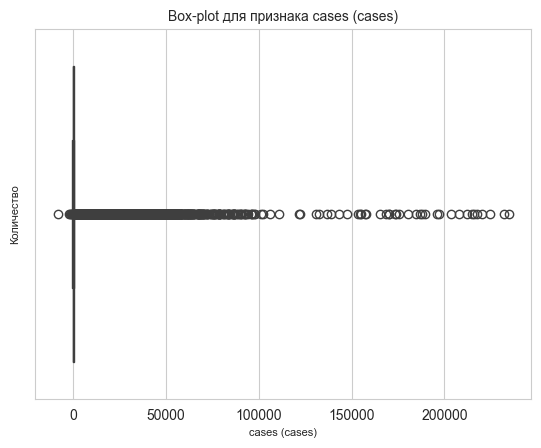

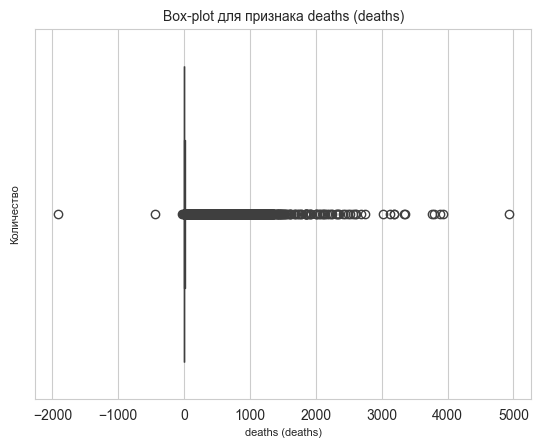

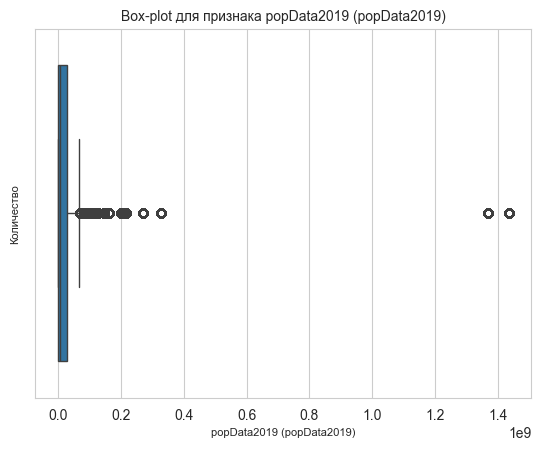

In [59]:
# Числовые признаки
names_digit = df.select_dtypes(exclude='object').columns.to_list()
get_boxplot(df, xlbl=names_digit, columns=names_digit)
# категориальные признаки
names_cat = df.select_dtypes(include='object').columns.to_list()
# для каждого из категориальных  признаков определяем количество уникальных значений.
# это понадобится для задания параметра binwidth при построении гистограмм
unique_counts = pd.DataFrame.from_records([(col, df[col].nunique()) for col in names_cat],
                                          columns=['Наименование признака', 'Кол-во уникальных значений']).sort_values(by=['Кол-во уникальных значений'])

In [58]:
df.continentExp.unique()
df.countryterritoryCode.unique()
df.countriesAndTerritories.unique()
df.dateRep.unique()
#Посмотреть, для каких стран количество смертей в день превысило 3000
df[df['deaths']>3000]['countriesAndTerritories'].unique()

array(['Argentina', 'Ecuador', 'Mexico', 'Peru',
       'United_States_of_America'], dtype=object)

In [57]:
#и сколько таких дней было
len(df[df['deaths']>3000])

11

## Задание 12
Найти дублирование данных. Удалить дубликаты.

In [60]:
df.duplicated().any() # проверяем, есть ли дубликаты

np.True_

In [61]:
# теперь ищем непосредственно записи-дубликаты
duplicate = df[df.duplicated(keep=False)]

print("Duplicate Rows :")
duplicate

Duplicate Rows :


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,countryterritoryCode,popData2019,continentExp
2,12/12/2020,12,12,2020,113,11,Afghanistan,AFG,38041757.0,Asia
3,12/12/2020,12,12,2020,113,11,Afghanistan,AFG,38041757.0,Asia
217,12/05/2020,12,5,2020,285,2,Afghanistan,AFG,38041757.0,Asia
218,12/05/2020,12,5,2020,285,2,Afghanistan,AFG,38041757.0,Asia
48009,29/05/2020,29,5,2020,0,0,Saint_Lucia,LCA,182795.0,America
48010,29/05/2020,29,5,2020,0,0,Saint_Lucia,LCA,182795.0,America
48072,28/03/2020,28,3,2020,0,0,Saint_Lucia,LCA,182795.0,America
48073,28/03/2020,28,3,2020,0,0,Saint_Lucia,LCA,182795.0,America


In [62]:
# и удаляем
df_cleaned = df.drop_duplicates(keep="first")
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61900 entries, 0 to 61903
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   dateRep                  61900 non-null  object 
 1   day                      61900 non-null  int64  
 2   month                    61900 non-null  int64  
 3   year                     61900 non-null  int64  
 4   cases                    61900 non-null  int64  
 5   deaths                   61900 non-null  int64  
 6   countriesAndTerritories  61900 non-null  object 
 7   countryterritoryCode     61777 non-null  object 
 8   popData2019              61777 non-null  float64
 9   continentExp             61900 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 5.2+ MB


## Задание 13
Загрузить данные из файла “bmi.csv”. Взять оттуда две выборки. Одна выборка – это индекс массы тела людей c региона northwest, вторая выборка – это индекс массы тела людей с региона southwest. Сравнить средние значения этих выборок, используя t-критерий Стьюдента. Предварительно проверить выборки на нормальность (критерий ШопироУилка) и на гомогенность дисперсии (критерий Бартлетта).

In [63]:
#Загрузить данные из файла “bmi.csv”
df = pd.read_csv("bmi.csv")
df

,bmi,region
0,27.900,southwest
1,33.770,southeast
2,33.000,southeast
3,22.705,northwest
4,28.880,northwest
...,...,...
1333,30.970,northwest
1334,31.920,northeast
1335,36.850,southeast
1336,25.800,southwest


In [64]:
df.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [65]:
#Взять оттуда две выборки. Одна выборка – это индекс массы тела людей c региона northwest, вторая выборка – это индекс массы тела людей с региона southwest.
df_n = df[df['region']=='northwest']
df_s = df[df['region']=='southwest']
len(df_n), len(df_s)


def shapiro_test(data):
    """
    Служебная функция для вывода информации по тесту Шапиро-Уилкса для небольших выборок
    """
    seed(1)
    stat, p = shapiro(data)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print('Предположительно нормальное распределение (Недостаточно данных, чтобы отвергнуть H0)')
    else:
        print('Отвергаем H0 о нормальности распределения')

shapiro_test(df_n['bmi'])
shapiro_test(df_s['bmi'])

stat, pvalue = sts.bartlett(df_n['bmi'], df_s['bmi'])
# print(float(statistic), float(pvalue))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))
alpha = 0.05
if pvalue > alpha:
    print('p-уровень превышает 0.05, следовательно, дисперсии выборок примерно одинаковы. Можем переходить к критерию Стьюдента')
else:
    print('Отвергаем H0 о принадлежности выборок к генеральным совокупностям с одинаковыми дисперсиями')

#Сравнить средние значения этих выборок, используя t-критерий Стьюдента.
stat, p = sts.ttest_ind(df_n['bmi'], df_s['bmi'], equal_var = True)


print('Статистика=%.5f, p=%.5f' % (stat, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')




Statistics=0.995, p=0.466
Предположительно нормальное распределение (Недостаточно данных, чтобы отвергнуть H0)
Statistics=0.995, p=0.363
Предположительно нормальное распределение (Недостаточно данных, чтобы отвергнуть H0)
Statistics=3.400, p=0.065
p-уровень превышает 0.05, следовательно, дисперсии выборок примерно одинаковы. Можем переходить к критерию Стьюдента
Статистика=-3.28442, p=0.00108
Отклоняем нулевую гипотезу, средние, вероятно, различаются


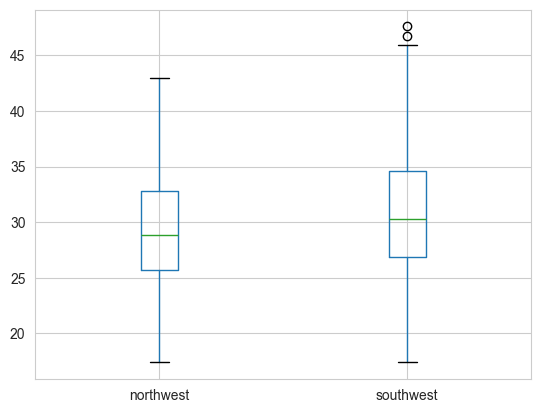

In [66]:
df_reg =\
    pd.DataFrame({
        'northwest': df_n['bmi'].to_list(),
        'southwest': df_s['bmi'].to_list()
    })

df_reg.boxplot()
plt.show()

ТО, что средние различаются, видно и на боксплотах для northwest и southwest

## Задание 14
Кубик бросили 600 раз, получили следующие результаты:
|N|Количество выпадений|
|-|-|
|1|97|
|2|98|
|3|109|
|4|95|
|5|97|
|6|104|

С помощью критерия Хи-квадрат проверить, является ли полученное распределение равномерным. Использовать функцию scipy.stats.chisquare().


In [67]:
data = pd.DataFrame({'points': [1,2,3,4,5,6],
 'observed': [97,98,109,95,97,104],
 'expected': [100,100,100,100,100,100]})
data

,points,observed,expected
0,1,97,100
1,2,98,100
2,3,109,100
3,4,95,100
4,5,97,100
5,6,104,100


In [68]:
stat, pvalue = sts.chisquare(data['observed'], data['expected'])[:2]
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))
if pvalue > 0.05:
    print('Не отклоняем нулевую гипотезу о равномерности распределения')
else:
    print('Отклоняем нулевую гипотезу')

Statistics=1.440, p=0.920
Не отклоняем нулевую гипотезу о равномерности распределения


## Задание 15
С помощью критерия Хи-квадрат проверить, являются ли переменные зависимыми. Создать датафрейм, используя следующий код:

```python
data = pd.DataFrame({'Женат': [89,17,11,43,22,1],
 'Гражданский брак': [80,22,20,35,6,4],
 'Не состоит в отношениях': [35,44,35,6,8,22]})
data.index = ['Полный рабочий день','Частичная занятость','Временно не
работает','На домохозяйстве','На пенсии','Учёба']
```

Использовать функцию scipy.stats.chi2_contingency(). Влияет ли семейное положение на занятость?

In [69]:
data = pd.DataFrame({'Женат': [89,17,11,43,22,1],
 'Гражданский брак': [80,22,20,35,6,4],
 'Не состоит в отношениях': [35,44,35,6,8,22]})
data.index = ['Полный рабочий день','Частичная занятость','Временно не работает','На домохозяйстве','На пенсии','Учёба']

In [70]:
data

,Женат,Гражданский брак,Не состоит в отношениях
Полный рабочий день,89,80,35
Частичная занятость,17,22,44
Временно не работает,11,20,35
На домохозяйстве,43,35,6
На пенсии,22,6,8
Учёба,1,4,22


In [71]:
# С помощью критерия Хи-квадрат проверить, являются ли переменные зависимыми
# H0: категориальные переменные A - занятость и B - семейное положение независимы;
# H1: категориальные переменные A и B связаны между собой.
stat, pvalue = sts.chi2_contingency(data)[:2]
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))
if pvalue > 0.05:
    print('Не отклоняем нулевую гипотезу о независимости занятости и семейного положения')
else:
    print('Отклоняем нулевую гипотезу, семейное положение и занятость, вероятно, связаны')

Statistics=122.297, p=0.000
Отклоняем нулевую гипотезу, семейное положение и занятость, вероятно, связаны
